### Import all price data from database fact_listings 

In [36]:
import sys 
from pathlib import Path
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

sys.path.append(str(Path.cwd().parent))

In [3]:
import pandas as pd 
from sqlalchemy import create_engine
from backend.settings import settings

engine = create_engine(settings.DATABASE_URL)

table_name = settings.VIEW_OR_TABLE     # "fact_listings"
schema_name = settings.SCHEMA           # default "realestate"

df = pd.read_sql_table(table_name, con=engine, schema=schema_name)



In [4]:
df = pd.read_sql_query(
    """
    SELECT *
    FROM realestate.fact_listings
    """,
    con=engine,
)

In [5]:
df.head()

,listing_id,snapshot_date,city,type,square_m,rooms,floor,floor_count,build_year,latitude,...,ownership,building_material,condition,has_parking_space,has_balcony,has_elevator,has_security,has_storage_room,price,geom
0,c26796554585aaa084f00bd8a9f00690,2024-01-01,poznan,None,43.00,2,NaN,NaN,1964.0,52.416547,...,condominium,None,None,False,False,None,False,False,449000.0,0101000020E6100000F33405D781E23040C49E2C6B5135...
1,2535aa4258f53f4c5495a54d640c802a,2024-01-01,poznan,None,37.54,2,NaN,4.0,2023.0,52.404513,...,condominium,None,None,False,False,None,False,False,619410.0,0101000020E6100000E02582829CEF3040F3E8A111C733...
2,23a3d6f183684e6c12567095df374232,2024-01-01,poznan,blockOfFlats,33.10,1,3.0,4.0,1969.0,52.417090,...,condominium,brick,None,False,False,False,True,True,390000.0,0101000020E61000007D3F355EBAE130408CBE82346335...
3,327ed4902457986b2bc1a013ea4e8844,2024-01-01,poznan,tenement,49.70,2,3.0,4.0,NaN,52.398710,...,condominium,brick,None,False,True,False,False,False,399000.0,0101000020E610000080D4264EEEE73040494BE5ED0833...
4,9ab80e2836da53e5e28caa2ce3c92a83,2024-01-01,poznan,tenement,76.94,3,3.0,4.0,1900.0,52.398806,...,condominium,brick,None,False,False,None,False,False,749000.0,0101000020E61000007965EE8C7CE730400C9AF1110C33...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266415 entries, 0 to 266414
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   listing_id             266415 non-null  object 
 1   snapshot_date          266415 non-null  object 
 2   city                   266415 non-null  object 
 3   type                   207392 non-null  object 
 4   square_m               266415 non-null  float64
 5   rooms                  266415 non-null  int64  
 6   floor                  223208 non-null  float64
 7   floor_count            262653 non-null  float64
 8   build_year             214517 non-null  float64
 9   latitude               266415 non-null  float64
 10  longitude              266415 non-null  float64
 11  centre_distance        266415 non-null  float64
 12  poi_count              266415 non-null  int64  
 13  school_distance        266232 non-null  float64
 14  clinic_distance        265637 non-nu

In [9]:
df.describe()

,square_m,rooms,floor,floor_count,build_year,latitude,longitude,centre_distance,poi_count,school_distance,clinic_distance,post_office_distance,kindergarten_distance,restaurant_distance,college_distance,pharmacy_distance,price
count,266415.000000,266415.000000,223208.000000,262653.000000,214517.000000,266415.000000,266415.000000,266415.000000,266415.000000,266232.000000,265637.000000,266141.000000,266165.000000,265782.000000,260105.000000,266058.000000,2.664150e+05
mean,57.781554,2.600965,3.356775,5.409034,1988.870206,51.962273,19.525827,4.219511,21.878269,0.400989,0.918584,0.504065,0.356822,0.322840,1.401178,0.345021,5.766722e+05
std,21.808572,0.913106,2.564715,3.356407,33.409773,1.301069,1.758002,2.785979,25.159092,0.435368,0.852449,0.472085,0.415910,0.431425,1.083914,0.427448,4.920273e+05
min,25.000000,1.000000,1.000000,1.000000,1850.000000,49.978999,14.447100,0.010000,0.000000,0.002000,0.001000,0.001000,0.001000,0.001000,0.004000,0.001000,3.460000e+02
25%,42.460000,2.000000,2.000000,3.000000,1970.000000,51.103008,18.543291,1.920000,7.000000,0.176000,0.336000,0.238000,0.155000,0.104000,0.560000,0.141000,8.000000e+03
50%,53.000000,2.000000,3.000000,4.000000,2001.000000,52.193010,19.926100,3.820000,14.000000,0.289000,0.640000,0.391000,0.261000,0.215000,1.072000,0.238000,5.750000e+05
75%,67.580000,3.000000,4.000000,6.000000,2017.000000,52.343422,20.995487,5.970000,26.000000,0.463000,1.161000,0.611000,0.412000,0.391000,2.014000,0.400000,8.250000e+05
max,150.000000,6.000000,30.000000,30.000000,2024.000000,54.606460,23.208873,16.940000,212.000000,4.946000,4.999000,4.970000,4.961000,4.985000,5.000000,4.992000,3.250000e+06


## Data analysis with each property and prediction 


In [7]:
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])
df = df.sort_values(['listing_id', 'snapshot_date'])

- Add "price change" and "price change trend"
- `price_chage` : PLN value change
- `price_change_pct` : relative chnage
- `days_since_prev` : gap between snapshots

In [ ]:
df['prev_price'] = df.groupby('listing_id')['price'].shift(1)
# need to verify this group correcty and listing 
df['price_change'] = df['price'] - df['prev_price']
df['price_change_pct'] = df['price_change'] / df['prev_price']

In [10]:
df['days_since_prev'] = (
    df.groupby('listing_id')['snapshot_date']
      .diff()
      .dt.days
)

- What the next price will be? 
Given all info up to this snapshot, predict what the next snapshot’s price* will be.”

In [12]:
df['next_price'] = df.groupby('listing_id')['price'].shift(-1)

In [14]:
features = [
    'city','type','square_m','rooms','floor','floor_count','build_year',
    'centre_distance','school_distance','clinic_distance','pharmacy_distance',
    'price','price_change','price_change_pct','days_since_prev'
]
features = [f for f in features if f in df.columns]
target = 'next_price'

In [15]:
# df = df[df['price'] > 10_000]  # filter junk

for col in features:
    if df[col].dtype.kind in 'biufc':  # numeric
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].astype(str).fillna('NA')

In [17]:
y = np.log1p(df[target])
X = df[features]

- Split data

In [18]:
split_date = df['snapshot_date'].quantile(0.8)
X_train = X[df['snapshot_date'] <= split_date]
y_train = y[df['snapshot_date'] <= split_date]
X_valid = X[df['snapshot_date'] > split_date]
y_valid = y[df['snapshot_date'] > split_date]

In [20]:
df = df.dropna(subset=['next_price'])

In [21]:
from catboost import CatBoostRegressor, Pool

cat_cols = [c for c in ['city','type'] if c in X.columns]
cat_idx = [X.columns.get_loc(c) for c in cat_cols]

train_pool = Pool(X_train, label=y_train, cat_features=cat_idx)
valid_pool = Pool(X_valid, label=y_valid, cat_features=cat_idx)

model = CatBoostRegressor(
    depth=8, learning_rate=0.05, iterations=3000,
    loss_function='RMSE', random_seed=42, od_wait=200, verbose=200
)
model.fit(train_pool, eval_set=valid_pool, use_best_model=True)


CatBoostError: catboost/libs/metrics/metric.cpp:6956: metric/loss-function RMSE do not allows nan value on target

- Repairing above error

In [44]:
df = df.copy()
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'], errors='coerce')
df = df.dropna(subset=['snapshot_date'])
df = df.sort_values(['listing_id', 'snapshot_date'])

In [45]:
# light price cleaning 
df = df[df['price'] > 10_000]                      # remove junk
df = df[df['price'] < 50_000_000]      

In [46]:
# Temporal features (per listing_id)
df['prev_price']       = df.groupby('listing_id')['price'].shift(1)
df['price_change']     = df['price'] - df['prev_price']
df['price_change_pct'] = df['price_change'] / df['prev_price']
df['days_since_prev']  = df.groupby('listing_id')['snapshot_date'].diff().dt.days


In [47]:
# Target = next snapshot's price
df['next_price']   = df.groupby('listing_id')['price'].shift(-1)
df['target_price'] = df['next_price']

In [ ]:
# Keep only rows that actually have a next price and it’s valid
df = df.dropna(subset=['target_price'])
df = df[df['target_price'] > 10_000]
df = df[df['target_price'] < 5_000_000]

In [48]:
# Features
cat_cols = [c for c in ['city','type','ownership','building_material','condition'] if c in df.columns]
has_cols = [c for c in df.columns if c.startswith('has_')]
num_candidates = [
    'square_m','rooms','floor','floor_count','build_year','latitude','longitude',
    'centre_distance','poi_count','school_distance','clinic_distance','post_office_distance',
    'kindergarten_distance','restaurant_distance','college_distance','pharmacy_distance',
    'price','price_change','price_change_pct','days_since_prev'
]
num_cols = [c for c in num_candidates if c in df.columns]

In [49]:
feature_cols = cat_cols + has_cols + num_cols
target_col   = 'target_price'

In [50]:
# Missing values / dtypes
df_model = df[feature_cols + [target_col, 'snapshot_date']].copy()

In [51]:

for c in num_cols + has_cols:
    if c in df_model.columns:
        df_model[c] = pd.to_numeric(df_model[c], errors='coerce')

for c in num_cols:
    if c in df_model.columns:
        med = df_model[c].median()
        df_model[c] = df_model[c].fillna(med).astype('float32')


for c in has_cols:
    if c in df_model.columns:
        df_model[c] = df_model[c].fillna(0).astype('int8')


for c in cat_cols:
    if c in df_model.columns:
        df_model[c] = df_model[c].astype('string').fillna('NA')

In [52]:
# Build X/y with log target
X = df_model[feature_cols].copy()
y = np.log1p(df_model[target_col].astype(float))

# Time-based split (train past → validate future)
split_date = df_model['snapshot_date'].quantile(0.8)
train_mask = df_model['snapshot_date'] <= split_date
valid_mask = df_model['snapshot_date'] >  split_date

X_train, X_valid = X[train_mask], X[valid_mask]
y_train, y_valid = y[train_mask], y[valid_mask]

In [55]:
# drop any residual NaN/Inf from target 
def _clean_xy(X_, y_):
    m = y_.notna() & np.isfinite(y_)
    return X_.loc[m], y_.loc[m]

X_train, y_train = _clean_xy(X_train, y_train)
X_valid, y_valid = _clean_xy(X_valid, y_valid)

In [53]:
# Cat indices (true categoricals only)
cat_idx = [X.columns.get_loc(c) for c in cat_cols if c in X.columns]

train_pool = Pool(X_train, label=y_train, cat_features=cat_idx)
valid_pool = Pool(X_valid, label=y_valid, cat_features=cat_idx)

In [56]:
model = CatBoostRegressor(
    loss_function='RMSE',
    depth=8,
    learning_rate=0.05,
    n_estimators=4000,
    random_seed=42,
    eval_metric='RMSE',
    od_type='Iter',
    od_wait=200,
    verbose=200
)
model.fit(train_pool, eval_set=valid_pool, use_best_model=True)

CatBoostError: catboost/libs/metrics/metric.cpp:6956: metric/loss-function RMSE do not allows nan value on target

In [ ]:
# Evaluate in PLN
pred_log = model.predict(valid_pool)
y_real = np.expm1(y_valid.to_numpy())
p_real = np.expm1(pred_log)

mae  = mean_absolute_error(y_real, p_real)
rmse = np.sqrt(mean_squared_error(y_real, p_real))
mape = np.mean(np.abs((y_real - p_real) / np.clip(y_real, 1, None))) * 100
smape = 100 * np.mean(2 * np.abs(p_real - y_real) / (np.abs(p_real) + np.abs(y_real) + 1e-9))

print(f"FUTURE SNAPSHOT — MAE: {mae:,.0f} PLN | RMSE: {rmse:,.0f} PLN | MAPE: {mape:.2f}% | sMAPE: {smape:.2f}%")

FUTURE SNAPSHOT — MAE: 10,429 PLN | RMSE: 26,208 PLN | MAPE: 1.25% | sMAPE: 1.24%


In [39]:
# --- Make predictions on the validation set
valid_pred_log = model.predict(valid_pool)
df_valid = X_valid.copy()
df_valid['snapshot_date'] = df_model.loc[valid_mask, 'snapshot_date']
df_valid['listing_id'] = df.loc[valid_mask, 'listing_id'].values
df_valid['actual_price'] = np.expm1(y_valid.to_numpy())
df_valid['predicted_price'] = np.expm1(valid_pred_log)

# Sort by listing and date to see progression
df_valid_sorted = df_valid.sort_values(['listing_id', 'snapshot_date'])

# Show a few examples
df_valid_sorted[['listing_id', 'snapshot_date', 'actual_price', 'predicted_price']]


,listing_id,snapshot_date,actual_price,predicted_price
59166,0001bc480f7a6cda692806924c76fba5,2024-04-01,1175000.0,1.268297e+06
53573,000967d7ab16f577f7c16cce90215669,2024-04-01,685000.0,6.875489e+05
51977,000a7386d96f274f02e19cbe17c50d6a,2024-04-01,1270000.0,1.268741e+06
58642,0019f909fb6123bda7fe5ad7185722aa,2024-04-01,2330000.0,2.324824e+06
63553,001bf85c1dc6ad509ffc8873b0fe778f,2024-04-01,425000.0,4.356800e+05
...,...,...,...,...
62645,ffcabde14ddecf10cd84b96c4888d3a8,2024-04-01,788000.0,7.882978e+05
47802,ffcd82f566bc63b0104fc0f92c9a3980,2024-04-01,894000.0,9.026623e+05
63256,ffd7663f49c3b3a71f080d4ed221dec2,2024-04-01,949000.0,9.453162e+05
58183,fffbe26a093d6ec3f159c03494125979,2024-04-01,929000.0,9.610672e+05


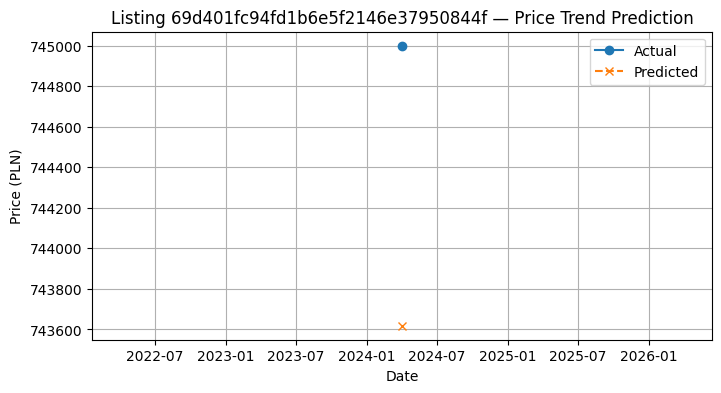

In [40]:
import matplotlib.pyplot as plt

# Pick one example listing from the validation set
sample_id = df_valid_sorted['listing_id'].sample(1).values[0]
sample = df_valid_sorted[df_valid_sorted['listing_id'] == sample_id]

plt.figure(figsize=(8, 4))
plt.plot(sample['snapshot_date'], sample['actual_price'], 'o-', label='Actual')
plt.plot(sample['snapshot_date'], sample['predicted_price'], 'x--', label='Predicted')
plt.title(f'Listing {sample_id} — Price Trend Prediction')
plt.xlabel('Date')
plt.ylabel('Price (PLN)')
plt.legend()
plt.grid(True)
plt.show()


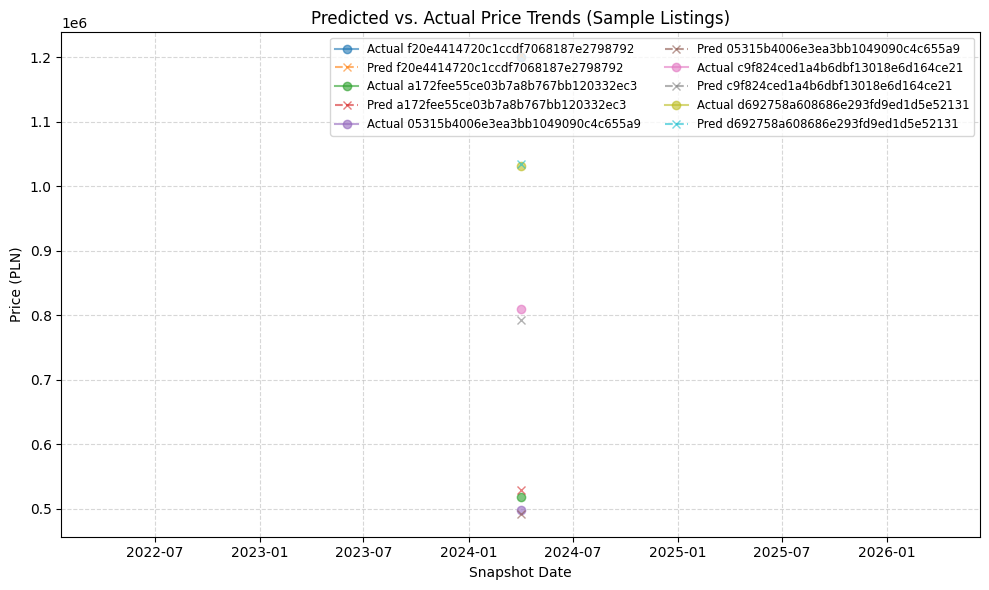

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Pick several random listing_ids from the validation set
sample_ids = df_valid_sorted['listing_id'].dropna().unique()
sample_ids = np.random.choice(sample_ids, size=5, replace=False)

plt.figure(figsize=(10, 6))

for lid in sample_ids:
    sample = df_valid_sorted[df_valid_sorted['listing_id'] == lid]

    # Plot actual and predicted
    plt.plot(sample['snapshot_date'], sample['actual_price'],
             'o-', label=f'Actual {lid}', alpha=0.6)
    plt.plot(sample['snapshot_date'], sample['predicted_price'],
             'x--', label=f'Pred {lid}', alpha=0.6)

plt.title('Predicted vs. Actual Price Trends next month')
plt.xlabel('Snapshot Date')
plt.ylabel('Price (PLN)')
plt.legend(ncol=2, fontsize='small')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


- to see all property predicted price

In [58]:
# Get the latest snapshot for each listing_id
df_latest = (
    df.sort_values(['listing_id', 'snapshot_date'])
      .groupby('listing_id', as_index=False)
      .tail(1)
      .reset_index(drop=True)
)

In [59]:
print(f"Total listings to forecast: {len(df_latest):,}")

Total listings to forecast: 24,326


In [60]:
# Use the same features you trained with
latest_X = df_latest[feature_cols].copy()

# Fill numeric and categorical values just like in training
for c in num_cols:
    latest_X[c] = pd.to_numeric(latest_X[c], errors='coerce')
    latest_X[c] = latest_X[c].fillna(df_model[c].median()).astype('float32')

for c in has_cols:
    latest_X[c] = latest_X[c].fillna(0).astype('int8')

for c in cat_cols:
    latest_X[c] = latest_X[c].astype('string').fillna('NA')


In [61]:
latest_pool = Pool(latest_X, cat_features=cat_idx)
pred_log = model.predict(latest_pool)
df_latest['predicted_next_price'] = np.expm1(pred_log)


CatBoostError: There is no trained model to use predict(). Use fit() to train model. Then use this method.

- Evaluate 

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

pred_log = model.predict(valid_pool)
y_real = np.expm1(y_valid)
p_real = np.expm1(pred_log)

mae = mean_absolute_error(y_real, p_real)
rmse = np.sqrt(mean_squared_error(y_real, p_real))
mape = np.mean(np.abs((y_real - p_real) / np.clip(y_real, 1, None))) * 100

print(f"VALID (future snapshot) — MAE: {mae:,.0f} PLN | RMSE: {rmse:,.0f} PLN | MAPE: {mape:.2f}%")


In [57]:
df

,listing_id,snapshot_date,city,type,square_m,rooms,floor,floor_count,build_year,latitude,...,has_security,has_storage_room,price,geom,prev_price,price_change,price_change_pct,days_since_prev,next_price,target_price
59166,0001bc480f7a6cda692806924c76fba5,2024-04-01,warszawa,blockOfFlats,85.0,3,1.0,3.0,2009.0,52.233800,...,True,True,1275000.0,0101000020E6100000C58F31772D21354004E78C28ED1D...,NaN,NaN,NaN,NaN,NaN,NaN
18246,000967d7ab16f577f7c16cce90215669,2024-02-01,wroclaw,apartmentBuilding,53.0,2,2.0,4.0,2010.0,51.120355,...,False,False,695000.0,0101000020E6100000C687D9CBB6ED30407E74EACA678F...,NaN,NaN,NaN,NaN,695000.0,695000.0
35581,000967d7ab16f577f7c16cce90215669,2024-03-01,wroclaw,apartmentBuilding,53.0,2,2.0,4.0,2010.0,51.120355,...,False,False,695000.0,0101000020E6100000C687D9CBB6ED30407E74EACA678F...,695000.0,0.0,0.0,29.0,695000.0,695000.0
53573,000967d7ab16f577f7c16cce90215669,2024-04-01,wroclaw,apartmentBuilding,53.0,2,2.0,4.0,2010.0,51.120355,...,False,False,695000.0,0101000020E6100000C687D9CBB6ED30407E74EACA678F...,695000.0,0.0,0.0,31.0,NaN,NaN
187671,00099201961c051e30735cb48ecc4f4a,2023-08-01,lodz,blockOfFlats,45.6,3,1.0,2.0,1940.0,51.778110,...,False,True,294000.0,0101000020E6100000B8585183698833406458C51B99E3...,NaN,NaN,NaN,NaN,294000.0,294000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256528,ffff369f1fb57bff8d9180282051be1a,2023-12-01,czestochowa,None,67.0,2,1.0,2.0,2001.0,50.777860,...,False,False,390000.0,0101000020E6100000CFA3E2FF8E28334057AFC7E99063...,390000.0,0.0,0.0,30.0,390000.0,390000.0
6256,ffff369f1fb57bff8d9180282051be1a,2024-01-01,czestochowa,None,67.0,2,1.0,2.0,2001.0,50.777860,...,False,False,390000.0,0101000020E6100000CFA3E2FF8E28334057AFC7E99063...,390000.0,0.0,0.0,31.0,390000.0,390000.0
22138,ffff369f1fb57bff8d9180282051be1a,2024-02-01,czestochowa,None,67.0,2,1.0,2.0,2001.0,50.777860,...,False,False,390000.0,0101000020E6100000CFA3E2FF8E28334057AFC7E99063...,390000.0,0.0,0.0,31.0,390000.0,390000.0
39092,ffff369f1fb57bff8d9180282051be1a,2024-03-01,czestochowa,None,67.0,2,1.0,2.0,2001.0,50.777860,...,False,False,390000.0,0101000020E6100000CFA3E2FF8E28334057AFC7E99063...,390000.0,0.0,0.0,29.0,390000.0,390000.0


### Data analysis_2


In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor, Pool

In [29]:
if 'snapshot_date' in df.columns and not np.issubdtype(df['snapshot_date'].dtype, np.datetime64):
    df['snapshot_date'] = pd.to_datetime(df['snapshot_date'], errors='coerce')

In [30]:
if 'listing_id' in df.columns and 'snapshot_date' in df.columns:
    df = df.sort_values(['listing_id', 'snapshot_date']).groupby('listing_id', as_index=False).tail(1).reset_index(drop=True)

In [31]:
target_col = 'price'
assert target_col in df.columns, "Column 'price' not found."

In [32]:
# Suggested categorical features (adjust to your schema)
cat_cols = [c for c in ['city','type','ownership','building_material','condition']
            if c in df.columns]


In [33]:
# Boolean flags become categorical (0/1) or kept as is—CatBoost can handle both
has_cols = [c for c in df.columns if c.startswith('has_')]

In [34]:
numeric_candidates = [
    'square_m','rooms','floor','floor_count','build_year','latitude','longitude',
    'centre_distance','poi_count','school_distance','clinic_distance','post_office_distance',
    'kindergarten_distance','restaurant_distance','college_distance','pharmacy_distance'
]
num_cols = [c for c in numeric_candidates if c in df.columns]

In [35]:
feature_cols = cat_cols + has_cols + num_cols

In [36]:
# --- 4) Filter rows with valid target and at least minimal features
df_model = df.dropna(subset=[target_col]).copy()

In [37]:
for c in num_cols:
    med = df_model[c].median() if c in df_model and pd.api.types.is_numeric_dtype(df_model[c]) else None
    if med is not None:
        df_model[c] = df_model[c].fillna(med)


In [38]:
for c in has_cols:
    if df_model[c].dtype == bool:
        df_model[c] = df_model[c].astype('int8')

In [43]:
for c in (num_cols + has_cols):
    if c in df_model.columns:
        df_model[c] = pd.to_numeric(df_model[c], errors='coerce')

# 2) Fill numerics with medians
for c in num_cols:
    if c in df_model.columns:
        med = df_model[c].median()
        df_model[c] = df_model[c].fillna(med).astype('float32')

# 3) Binary/flag features: fill missing with 0 and keep numeric (don’t mark as categorical)
for c in has_cols:
    if c in df_model.columns:
        # if it was boolean, this still works; if it was 0/1 with None, this fixes it
        df_model[c] = df_model[c].fillna(0).astype('int8')

# 4) Categorical features: cast to string, fill missing with sentinel
for c in cat_cols:
    if c in df_model.columns:
        df_model[c] = df_model[c].astype('string').fillna('NA')

In [44]:
# --- 6) Log-transform target for stability
y = np.log1p(df_model[target_col].astype(float))
X = df_model[feature_cols].copy()

In [45]:
# --- 7) Train/Validation split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [46]:
# Indices of categorical features for CatBoost
cat_idx = [X.columns.get_loc(c) for c in cat_cols + has_cols if c in X.columns]

train_pool = Pool(X_train, label=y_train, cat_features=cat_idx)
valid_pool = Pool(X_valid, label=y_valid, cat_features=cat_idx)

In [47]:
# --- 8) Model: a solid starting set of params
model = CatBoostRegressor(
    loss_function='RMSE',
    depth=8,
    learning_rate=0.05,
    l2_leaf_reg=6.0,
    n_estimators=5000,          # many trees + early stopping
    random_seed=42,
    eval_metric='RMSE',
    od_type='Iter',
    od_wait=200,                # early stopping patience
    verbose=200
)

model.fit(train_pool, eval_set=valid_pool, use_best_model=True)

0:	learn: 2.4528122	test: 2.4660279	best: 2.4660279 (0)	total: 155ms	remaining: 12m 56s
200:	learn: 2.0770408	test: 2.1185360	best: 2.1185360 (200)	total: 11.3s	remaining: 4m 29s
400:	learn: 2.0132619	test: 2.0775494	best: 2.0775494 (400)	total: 21.9s	remaining: 4m 11s
600:	learn: 1.9658958	test: 2.0494377	best: 2.0494377 (600)	total: 32.5s	remaining: 3m 58s
800:	learn: 1.9269320	test: 2.0298706	best: 2.0298706 (800)	total: 43.5s	remaining: 3m 47s
1000:	learn: 1.8939069	test: 2.0143935	best: 2.0143935 (1000)	total: 54.4s	remaining: 3m 37s
1200:	learn: 1.8633009	test: 2.0010651	best: 2.0010651 (1200)	total: 1m 5s	remaining: 3m 27s
1400:	learn: 1.8335453	test: 1.9891026	best: 1.9891026 (1400)	total: 1m 17s	remaining: 3m 17s
1600:	learn: 1.8044166	test: 1.9786448	best: 1.9786448 (1600)	total: 1m 28s	remaining: 3m 7s
1800:	learn: 1.7794573	test: 1.9692042	best: 1.9692042 (1800)	total: 1m 40s	remaining: 2m 58s
2000:	learn: 1.7560442	test: 1.9614362	best: 1.9614362 (2000)	total: 1m 55s	remai

In [48]:
# --- 9) Evaluate back in PLN space
pred_valid_log = model.predict(valid_pool)
yv_real = np.expm1(y_valid.to_numpy())
pv_real = np.expm1(pred_valid_log)

mae  = mean_absolute_error(yv_real, pv_real)
rmse = np.sqrt(mean_squared_error(yv_real, pv_real))
mape = np.mean(np.abs((yv_real - pv_real) / np.clip(yv_real, 1, None))) * 100
smape = 100 * np.mean(2 * np.abs(pv_real - yv_real) / (np.abs(pv_real) + np.abs(yv_real) + 1e-9))

print(f"VALID — MAE: {mae:,.0f} PLN | RMSE: {rmse:,.0f} PLN | MAPE: {mape:.2f}% | sMAPE: {smape:.2f}%")


VALID — MAE: 342,383 PLN | RMSE: 522,000 PLN | MAPE: 709.82% | sMAPE: 101.55%


In [50]:
df['price'].describe()

count    1.309080e+05
mean     5.461514e+05
std      4.811760e+05
min      3.460000e+02
25%      5.200000e+03
50%      5.500000e+05
75%      7.970000e+05
max      3.250000e+06
Name: price, dtype: float64

In [49]:
# --- 10) Feature importance
importances = pd.Series(model.get_feature_importance(valid_pool), index=X.columns).sort_values(ascending=False)
print("\nTop 20 feature importances:")
print(importances.head(20))


Top 20 feature importances:
square_m                 14.516017
build_year                9.174970
centre_distance           5.016290
rooms                     4.807415
has_storage_room          4.807119
latitude                  4.738724
longitude                 4.494768
condition                 4.217343
clinic_distance           4.104151
school_distance           3.972816
restaurant_distance       3.809791
college_distance          3.733215
kindergarten_distance     3.721625
post_office_distance      3.674809
pharmacy_distance         3.673473
poi_count                 3.037543
floor                     3.011121
floor_count               2.720699
type                      2.603013
city                      2.542437
dtype: float64


### Data manipulation 

1. Basic cleaning and setup

In [10]:

# Keep only rows with a valid target and core features
df = df.copy()

# Harmonize column names
required = [
    "price","square_m","city","type","rooms","floor","floor_count","build_year",
    "latitude","longitude","centre_distance","school_distance","clinic_distance",
    "post_office_distance","kindergarten_distance","restaurant_distance",
    "college_distance","pharmacy_distance","ownership","building_material",
    "condition","has_parking_space","has_balcony","has_elevator","has_security",
    "has_storage_room","snapshot_date","listing_id"
]
missing = [c for c in required if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns: {missing}")

In [11]:
df

,listing_id,snapshot_date,city,type,square_m,rooms,floor,floor_count,build_year,latitude,...,ownership,building_material,condition,has_parking_space,has_balcony,has_elevator,has_security,has_storage_room,price,geom
0,c26796554585aaa084f00bd8a9f00690,2024-01-01,poznan,None,43.00,2,NaN,NaN,1964.0,52.416547,...,condominium,None,None,False,False,None,False,False,449000.0,0101000020E6100000F33405D781E23040C49E2C6B5135...
1,2535aa4258f53f4c5495a54d640c802a,2024-01-01,poznan,None,37.54,2,NaN,4.0,2023.0,52.404513,...,condominium,None,None,False,False,None,False,False,619410.0,0101000020E6100000E02582829CEF3040F3E8A111C733...
2,23a3d6f183684e6c12567095df374232,2024-01-01,poznan,blockOfFlats,33.10,1,3.0,4.0,1969.0,52.417090,...,condominium,brick,None,False,False,False,True,True,390000.0,0101000020E61000007D3F355EBAE130408CBE82346335...
3,327ed4902457986b2bc1a013ea4e8844,2024-01-01,poznan,tenement,49.70,2,3.0,4.0,NaN,52.398710,...,condominium,brick,None,False,True,False,False,False,399000.0,0101000020E610000080D4264EEEE73040494BE5ED0833...
4,9ab80e2836da53e5e28caa2ce3c92a83,2024-01-01,poznan,tenement,76.94,3,3.0,4.0,1900.0,52.398806,...,condominium,brick,None,False,False,None,False,False,749000.0,0101000020E61000007965EE8C7CE730400C9AF1110C33...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266410,6ad7afd5b303a5421c2f79edf9f419f2,2024-01-01,poznan,apartmentBuilding,50.00,2,3.0,5.0,2015.0,52.409035,...,condominium,brick,premium,False,True,True,False,False,820000.0,0101000020E6100000C5168A8DDCF0304019366F415B34...
266411,5014ec66b43358450437030e19e17d4e,2024-01-01,poznan,blockOfFlats,59.40,2,1.0,3.0,2003.0,52.464910,...,condominium,brick,premium,True,True,False,False,True,640000.0,0101000020E61000000FD6FF39CCEF3040ACCABE2B823B...
266412,db2354b93053b883cd0b8a0f1bf6cc2c,2024-01-01,poznan,None,49.00,2,4.0,5.0,2024.0,52.406000,...,condominium,None,None,False,False,True,False,False,491000.0,0101000020E6100000B29DEFA7C6FB30408716D9CEF733...
266413,1e542fa3372c02bb88e430cc2b280cf3,2024-01-01,poznan,tenement,58.80,2,NaN,4.0,1920.0,52.413818,...,condominium,brick,premium,True,False,None,False,False,823200.0,0101000020E61000002A24F48EAEE9304057C04EFBF734...


In [12]:
unique_dates = df["snapshot_date"].dropna().unique()
unique_dates

array([datetime.date(2024, 1, 1), datetime.date(2024, 2, 1),
       datetime.date(2024, 3, 1), datetime.date(2024, 4, 1),
       datetime.date(2024, 5, 1), datetime.date(2023, 11, 1),
       datetime.date(2023, 12, 1), datetime.date(2024, 6, 1),
       datetime.date(2023, 8, 1), datetime.date(2023, 9, 1),
       datetime.date(2023, 10, 1)], dtype=object)

In [21]:
# Convert types
df["snapshot_date"] = pd.to_datetime(df["snapshot_date"], errors="coerce")
bool_cols = ["has_parking_space","has_balcony","has_elevator","has_security","has_storage_room"]
for c in bool_cols:
    if c in df.columns:
        df[c] = df[c].astype("boolean")

In [31]:
import numpy as np
import pandas as pd

USE_LOG_TARGET = True  # keep consistent across training & serving

if USE_LOG_TARGET:
    # guard against negative/NaN price
    bad = ~pd.to_numeric(df["price"], errors="coerce").ge(0)
    if bad.any():
        df = df.loc[~bad].copy()
    df["target_price"] = np.log1p(df["price"].astype(float))
else:
    df["target_price"] = df["price"].astype(float)

print("target_price created. Shape:", df.shape, "min/max target:",
      float(df["target_price"].min()), float(df["target_price"].max()))

target_price created. Shape: (130908, 30) min/max target: 5.849324779946859 14.99416586199818


2. Feature matrix

In [22]:
# Choose feature set 
num_features = [
    "square_m","rooms","floor","floor_count","build_year",
    "latitude","longitude","centre_distance","school_distance","clinic_distance",
    "post_office_distance","kindergarten_distance","restaurant_distance",
    "college_distance","pharmacy_distance"
]

cat_features = [
    "city","type","ownership","building_material","condition"
]

bool_as_int = bool_cols  # will cast to int 0/1

In [23]:
# Build X / y
X = df[num_features + cat_features + bool_as_int].copy()

In [24]:
# Cast booleans to int
for c in bool_as_int:
    if c in X.columns:
        X[c] = X[c].fillna(False).astype(int)

In [25]:
# Fill numerics with medians; categoricals with "Unknown"
for c in num_features:
    X[c] = X[c].astype(float).fillna(X[c].median())
for c in cat_features:
    X[c] = X[c].astype("string").fillna("Unknown")

In [32]:
y = df["target_price"]

In [33]:
y

0          8.318986
1          8.160804
2         13.976780
3         13.444303
4          8.243019
            ...    
130903    13.741865
130904    13.303019
130905    13.215856
130906    12.873905
130907    13.321216
Name: target_price, Length: 130908, dtype: float64

3. Time-based split

In [44]:
df["snapshot_date"] = pd.to_datetime(df["snapshot_date"], errors="coerce")
df = df.dropna(subset=["snapshot_date"])

valid_share = 0.20

ordered = df.sort_values("snapshot_date").reset_index()
n = len(ordered)
cut_idx = max(int(np.floor((1 - valid_share) * n)), 0)

train_idx = ordered.loc[: cut_idx - 1, "index"]
valid_idx = ordered.loc[cut_idx:, "index"]

train_mask = df.index.isin(train_idx)
valid_mask = df.index.isin(valid_idx)

print("Date range:", ordered["snapshot_date"].iloc[0].date(), "→", ordered["snapshot_date"].iloc[-1].date())
print("Cutoff:", ordered["snapshot_date"].iloc[cut_idx].date())
print("Train size:", train_mask.sum(), "Valid size:", valid_mask.sum())


Date range: 2023-08-01 → 2024-06-01
Cutoff: 2024-06-01
Train size: 104726 Valid size: 26182


In [46]:
df = df.copy()
df["snapshot_date"] = pd.to_datetime(df["snapshot_date"], errors="coerce")
df = df.dropna(subset=["snapshot_date"])

df_sorted = df.sort_values("snapshot_date").reset_index()
split_idx = max(int(np.floor(0.8 * len(df_sorted))), 1)  # 80% oldest → train

split_date = df_sorted.loc[split_idx - 1, "snapshot_date"]

train_ids = df_sorted.loc[: split_idx - 1, "index"]
valid_ids = df_sorted.loc[split_idx:, "index"]

train_mask = df.index.isin(train_ids)
valid_mask = df.index.isin(valid_ids)

X_train, y_train = X.loc[train_mask], y.loc[train_mask]
X_valid, y_valid = X.loc[valid_mask], y.loc[valid_mask]

print(
    "Train size:", len(X_train),
    "Valid size:", len(X_valid),
    "Split date:", split_date.date(),
)


Train size: 104726 Valid size: 26182 Split date: 2024-06-01


4. Train data

- CatBoost is a machine learning algorithm that uses gradient boosting on decision trees. 

In [ ]:
USE_LOG_TARGET = True  
MODEL_NAME = "catboost_v0"

In [ ]:
# Set feature groups  
cat_features = ["city","type","ownership","building_material","condition"]
num_features = [
    "square_m","rooms","floor","floor_count","build_year",
    "latitude","longitude","centre_distance","school_distance","clinic_distance",
    "post_office_distance","kindergarten_distance","restaurant_distance",
    "college_distance","pharmacy_distance"
]
bool_features = ["has_parking_space","has_balcony","has_elevator","has_security","has_storage_room"]


In [51]:
def prep_X(frame):
    import pandas as pd
    Xp = frame[num_features + cat_features + bool_features].copy()

    for c in bool_features:
        if c in Xp.columns:
            Xp[c] = Xp[c].fillna(False).astype(int)

    for c in num_features:
        Xp[c] = pd.to_numeric(Xp[c], errors="coerce")
        Xp[c] = Xp[c].fillna(Xp[c].median())

    for c in cat_features:
        Xp[c] = Xp[c].astype("string").fillna("Unknown")

    return Xp

In [52]:
X_train_prep = prep_X(df.loc[train_mask])
X_valid_prep = prep_X(df.loc[valid_mask])

# y vectors from your masks (already built earlier as y = df["target_price"])
y_train_vec = y.loc[train_mask]
y_valid_vec = y.loc[valid_mask]

In [ ]:
from catboost import CatBoostRegressor, Pool

# indices of categorical columns in the *prepared* matrix
cat_idx = [X_train_prep.columns.get_loc(c) for c in cat_features if c in X_train_prep.columns]

train_pool = Pool(X_train_prep, y_train_vec, cat_features=cat_idx)
valid_pool = Pool(X_valid_prep, y_valid_vec, cat_features=cat_idx)

params = dict(
    loss_function="RMSE",
    eval_metric="RMSE",
    depth=8,
    learning_rate=0.05,
    iterations=3000,
    random_seed=42,
    l2_leaf_reg=3.0,
    early_stopping_rounds=100,
    verbose=200,
)

model = CatBoostRegressor(**params)
model.fit(train_pool, eval_set=valid_pool)

0:	learn: 2.4463148	test: 2.4849284	best: 2.4849284 (0)	total: 260ms	remaining: 13m
200:	learn: 2.0699725	test: 2.1317335	best: 2.1317335 (200)	total: 12.9s	remaining: 2m 58s
400:	learn: 2.0008118	test: 2.0912719	best: 2.0912719 (400)	total: 25.2s	remaining: 2m 43s
600:	learn: 1.9491584	test: 2.0670505	best: 2.0670505 (600)	total: 36.8s	remaining: 2m 27s
800:	learn: 1.9064418	test: 2.0488002	best: 2.0487992 (799)	total: 48.4s	remaining: 2m 12s
1000:	learn: 1.8691046	test: 2.0355296	best: 2.0355296 (1000)	total: 1m	remaining: 2m
1200:	learn: 1.8347751	test: 2.0251927	best: 2.0251927 (1200)	total: 1m 12s	remaining: 1m 49s
1400:	learn: 1.8044777	test: 2.0156120	best: 2.0156120 (1400)	total: 1m 28s	remaining: 1m 40s
1600:	learn: 1.7756238	test: 2.0081714	best: 2.0081684 (1598)	total: 1m 45s	remaining: 1m 32s
1800:	learn: 1.7499915	test: 2.0016687	best: 2.0016359 (1798)	total: 2m 3s	remaining: 1m 22s
2000:	learn: 1.7225855	test: 1.9960103	best: 1.9960103 (2000)	total: 2m 21s	remaining: 1m 1

5. Evaluation

In [55]:
def to_real_space(arr):
    import numpy as np
    return np.expm1(arr) if USE_LOG_TARGET else arr

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Log → PLN

pred_valid = model.predict(valid_pool)

# yv_real = np.expm1(y_valid_vec.to_numpy())
yv_real = np.expm1(y_valid_vec)
pv_real = np.expm1(pred_valid)

# yv_real = to_real_space(y_valid_vec.to_numpy())
# pv_real = to_real_space(pred_valid)

mae  = mean_absolute_error(yv_real, pv_real)
rmse = np.sqrt(mean_squared_error(yv_real, pv_real))
mape = np.mean(np.abs((yv_real - pv_real) / np.clip(yv_real, 1, None))) * 100
smape = 100 * np.mean(2 * np.abs(pv_real - yv_real) / (np.abs(pv_real) + np.abs(yv_real) + 1e-9))

print(f"VALID — MAE: {mae:,.0f} PLN | RMSE: {rmse:,.0f} PLN | MAPE: {mape:.2f}% | sMAPE: {smape:.2f}%")


VALID — MAE: 373,476 PLN | RMSE: 557,566 PLN | MAPE: 789.75% | sMAPE: 105.46%


In [67]:
print("y_valid_vec describe():")
print(y_valid_vec.describe())
print("y_valid_vec sample:", y_valid_vec.head().to_list())

y_valid_vec describe():
count    26182.000000
mean        11.932473
std          2.507884
min          6.030685
25%          8.612685
50%         13.282356
75%         13.651816
max         14.914123
Name: target_price, dtype: float64
y_valid_vec sample: [8.31898612539206, 8.160803920954665, 13.976779556623864, 13.444303388018582, 8.006700845440367]


In [68]:
print("CatBoost train target sample:", train_pool.get_label()[:5])

CatBoost train target sample: [ 8.24301947 13.45883704  8.24301947 12.38422302  7.82444593]


In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
yv_real = y_valid_vec.to_numpy()
pv_real = pred_valid
mae  = mean_absolute_error(yv_real, pv_real)
rmse = np.sqrt(mean_squared_error(yv_real, pv_real))
print(f"Raw-space  MAE={mae:,.0f}  RMSE={rmse:,.0f}")


Raw-space  MAE=2  RMSE=2


In [62]:
# estimate variance of log residuals
pred_train_log = model.predict(train_pool)
resid_log = y_train_vec.to_numpy() - pred_train_log
sigma2 = float(np.var(resid_log))

# bias-corrected PLN prediction
pv_bc = np.expm1(pred_valid + 0.5 * sigma2)

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_bc  = mean_absolute_error(yv_real, pv_bc)
rmse_bc = np.sqrt(mean_squared_error(yv_real, pv_bc))
mape_bc = np.mean(np.abs((yv_real - pv_bc) / np.clip(yv_real, 1, None))) * 100

print(f"Bias-corrected → MAE: {mae_bc:,.0f} PLN | RMSE: {rmse_bc:,.0f} PLN | MAPE: {mape_bc:.2f}%")

Bias-corrected → MAE: 865,322 PLN | RMSE: 1,490,580 PLN | MAPE: 2928.85%


In [63]:
print("pred_valid log-space  min/median/max:",
      float(np.min(pred_valid)), float(np.median(pred_valid)), float(np.max(pred_valid)))

pred_valid log-space  min/median/max: 6.21105593978104 12.193040586272232 16.168055202692123


In [64]:
df[["price", "target_price"]].describe(percentiles=[.1, .5, .9])

,price,target_price
count,1.309080e+05,130908.000000
mean,5.461514e+05,11.885157
std,4.811760e+05,2.477257
min,3.460000e+02,5.849325
10%,2.600000e+03,7.863651
50%,5.500000e+05,13.217675
90%,1.117860e+06,13.926928
max,3.250000e+06,14.994166


In [65]:
pv_real = np.expm1(pred_valid)
print("Median pred (PLN):", np.median(pv_real))

Median pred (PLN): 197409.49819104897


In [60]:
print("Price stats (PLN):")
print("  yv_real  min/median/max:", yv_real.min(), np.median(yv_real), yv_real.max())
print("  pv_real  min/median/max:", pv_real.min(), np.median(pv_real), pv_real.max())

Price stats (PLN):
  yv_real  min/median/max: 415.0 586750.0000000005 3000000.000000001
  pv_real  min/median/max: 497.2270714054467 197409.49819104897 10512284.751428341


In [61]:
print("y_train_vec median:", np.median(y_train_vec))

y_train_vec median: 13.215855541983634


In [58]:
print("y_valid_vec median (raw):", float(np.nanmedian(y_valid_vec)))
print("pred_valid median (raw):", float(np.nanmedian(pred_valid)))

y_valid_vec median (raw): 13.282355727245175
pred_valid median (raw): 12.193040586272232


In [ ]:
by_city = (
    pd.DataFrame({
        "city": df.loc[valid_mask, "city"].values,
        "y": yv_real, "yhat": pv_real
    })
    .groupby("city")
    .apply(lambda g: pd.Series({
        "n": len(g),
        "MAE": mean_absolute_error(g["y"], g["yhat"]),
        "RMSE": mean_squared_error(g["y"], g["yhat"], squared=False),
        "MAPE_%": np.mean(np.abs((g["y"]-g["yhat"]) / np.clip(g["y"],1,None))) * 100
    }))
    .sort_values("MAE")
)
by_city.head(10)